In [1]:
import helper
import pandas as pd

import time
import numpy as np
import math

In [2]:
import datetime
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [67]:
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


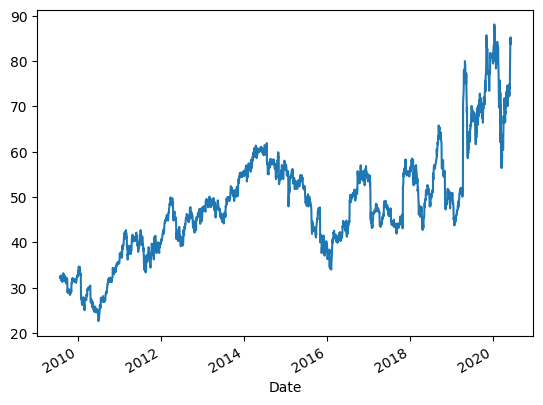

In [69]:
# Get the data for the stock AAPL
data = yf.download('QCOM','2009-07-27','2020-06-11')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

In [70]:
df = data

df = df.reset_index()
df = df.rename(columns={"index":"New_ID"})
df['New_ID'] = df.index

df

,Date,Open,High,Low,Close,Adj Close,Volume,New_ID
0,2009-07-27,46.970001,47.349998,46.160000,46.480000,32.345993,15153300,0
1,2009-07-28,46.340000,46.520000,45.950001,46.360001,32.262466,15059600,1
2,2009-07-29,46.009998,46.500000,45.799999,46.250000,32.185925,11081000,2
3,2009-07-30,46.700001,47.450001,46.380001,46.520000,32.373814,15013700,3
4,2009-07-31,46.259998,46.849998,46.040001,46.209999,32.158077,13433700,4
...,...,...,...,...,...,...,...,...
2733,2020-06-04,83.949997,86.699997,83.949997,86.040001,80.275909,12109000,2733
2734,2020-06-05,88.000000,89.480003,87.820000,88.550003,82.617752,11882100,2734
2735,2020-06-08,89.000000,91.500000,88.339996,91.370003,85.248825,9748300,2735
2736,2020-06-09,90.230003,90.389999,89.059998,89.750000,83.737358,7327700,2736


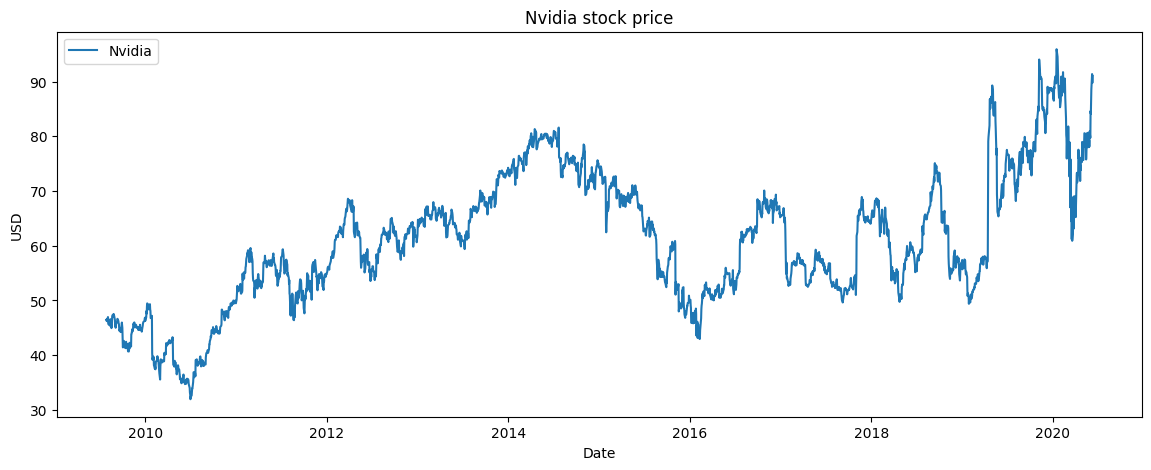

In [71]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df['Date'], df['Close'], label='Nvidia')
#plt.vlines(datetime.date(2017,3, 7), 20, 90, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Nvidia stock price')
plt.legend()
plt.show()

In [72]:
dataset_ex_df = df

dataset_TI_df = helper.get_technical_indicators(dataset_ex_df, "Close")
dataset_TI_df = dataset_TI_df[20:]
dataset_TI_df.reset_index(drop=True, inplace=True)
dataset_TI_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,New_ID,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,2009-08-24,46.860001,47.500000,46.860001,47.410000,32.993179,11622100,20,46.248572,46.205239,46.258594,46.393626,0.135032,0.675459,47.556157,44.854321,47.290927,46.410000,3.837515
1,2009-08-25,47.270000,47.849998,46.880001,46.990002,32.700901,21489900,21,46.371429,46.229525,46.324984,46.487762,0.162777,0.698043,47.625611,44.833438,47.090310,45.990002,3.828424
2,2009-08-26,46.990002,47.779999,46.759998,47.529999,33.196777,14478300,22,46.740001,46.285239,46.432568,46.651620,0.219052,0.756850,47.798938,44.771539,47.383436,46.529999,3.840097
3,2009-08-27,47.380001,47.570000,46.799999,47.250000,33.001228,10719700,23,47.040000,46.332858,46.504455,46.745380,0.240925,0.785730,47.904317,44.761399,47.294479,46.250000,3.834061
4,2009-08-28,47.730000,48.200001,46.939999,47.220001,32.980278,11981100,24,47.254286,46.366191,46.566521,46.819537,0.253016,0.810129,47.986449,44.745933,47.244827,46.220001,3.833413


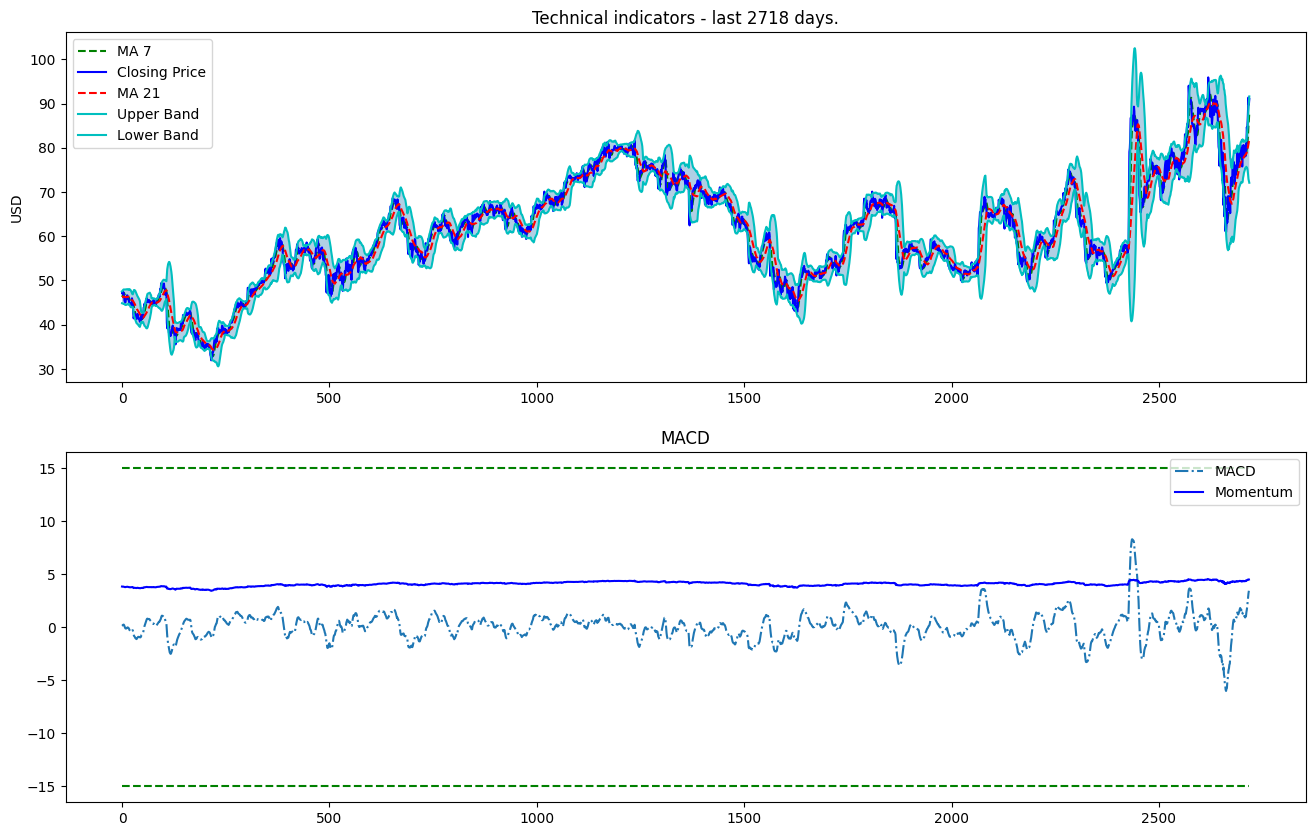

In [73]:
helper.plot_technical_indicators(dataset_TI_df, len(dataset_TI_df))

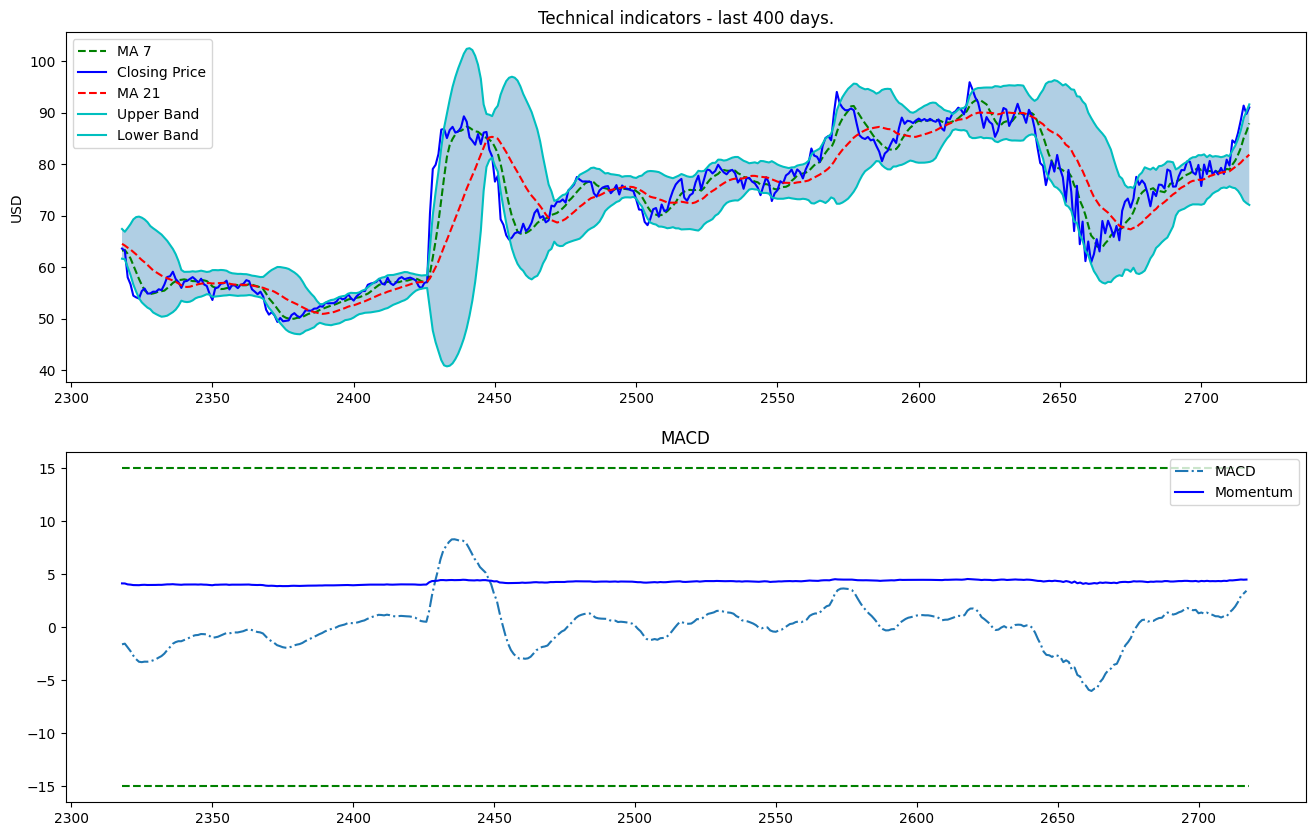

In [74]:
helper.plot_technical_indicators(dataset_TI_df, 400)

In [75]:
data_FT = dataset_ex_df[['Date', 'Close']]

In [76]:
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

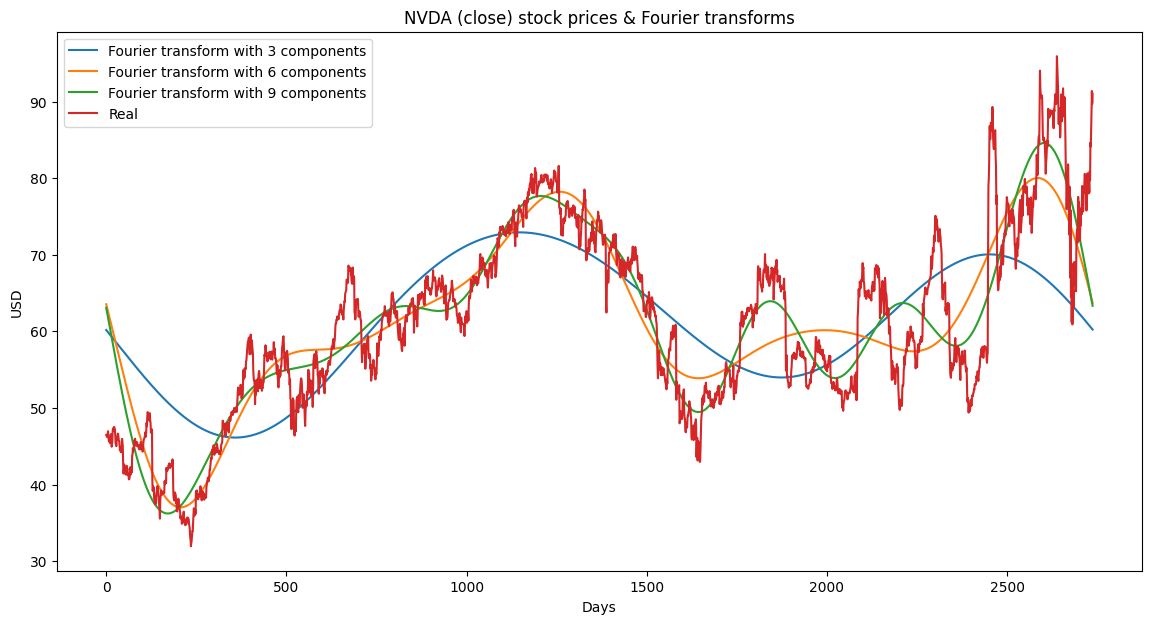

In [77]:
plt.figure(figsize=(14, 7), dpi=100)

fft_list = np.asarray(fft_df['fft'].tolist())

for num_ in [3, 6, 9]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
    
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('NVDA (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [78]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

series = data_FT['Close']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
#model_fit = model.fit(disp=0)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2738
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4372.875
Date:                Wed, 08 Nov 2023   AIC                           8757.751
Time:                        16:49:59   BIC                           8793.239
Sample:                             0   HQIC                          8770.575
                               - 2738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0643      0.008     -8.277      0.000      -0.079      -0.049
ar.L2          0.0558      0.010      5.337      0.000       0.035       0.076
ar.L3          0.0073      0.011      0.659      0.5

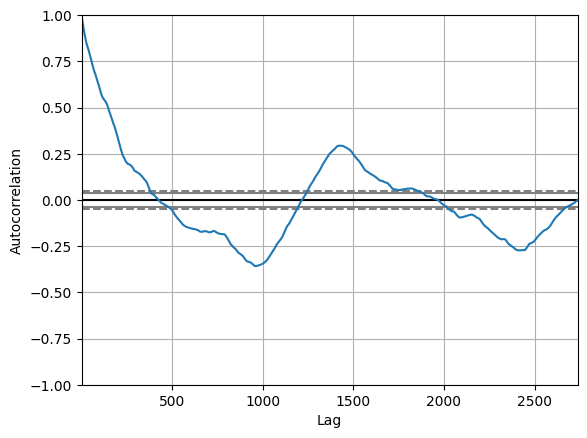

<Figure size 800x560 with 0 Axes>

In [79]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

In [81]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    #model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [82]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 2.584


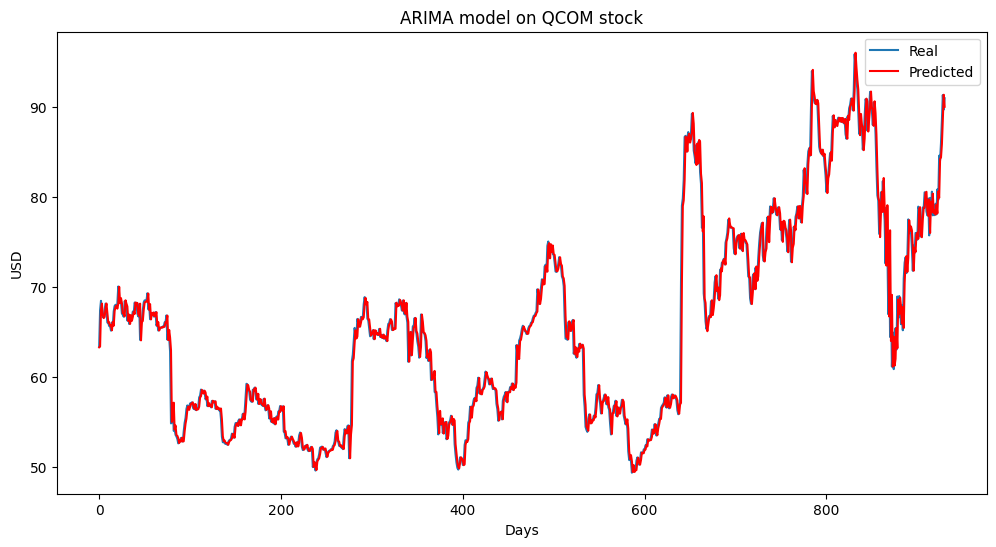

In [83]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('ARIMA model on QCOM stock')
plt.legend()
plt.show()

In [84]:
dataset_total = dataset_ex_df
dataset_total

,Date,Open,High,Low,Close,Adj Close,Volume,New_ID,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,2009-07-27,46.970001,47.349998,46.160000,46.480000,32.345993,15153300,0,NaN,NaN,46.480000,46.480000,0.000000,NaN,NaN,NaN,46.480000,45.480000,3.817273
1,2009-07-28,46.340000,46.520000,45.950001,46.360001,32.262466,15059600,1,NaN,NaN,46.417692,46.415000,-0.002692,NaN,NaN,NaN,46.390000,45.360001,3.814631
2,2009-07-29,46.009998,46.500000,45.799999,46.250000,32.185925,11081000,2,NaN,NaN,46.357442,46.350601,-0.006842,NaN,NaN,NaN,46.293077,45.250000,3.812203
3,2009-07-30,46.700001,47.450001,46.380001,46.520000,32.373814,15013700,3,NaN,NaN,46.402886,46.404073,0.001187,NaN,NaN,NaN,46.446250,45.520000,3.818152
4,2009-07-31,46.259998,46.849998,46.040001,46.209999,32.158077,13433700,4,NaN,NaN,46.358155,46.351344,-0.006811,NaN,NaN,NaN,46.288099,45.209999,3.811318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2020-06-04,83.949997,86.699997,83.949997,86.040001,80.275909,12109000,2733,81.827143,79.855714,79.398876,81.362323,1.963447,2.508215,84.872145,74.839283,85.276900,85.040001,4.443122
2734,2020-06-05,88.000000,89.480003,87.820000,88.550003,82.617752,11882100,2734,83.150000,80.316666,80.076737,82.468120,2.391382,3.148837,86.614340,74.018993,87.458969,87.550003,4.472210
2735,2020-06-08,89.000000,91.500000,88.339996,91.370003,85.248825,9748300,2735,85.044286,80.913809,80.913276,83.837640,2.924365,3.993781,88.901371,72.926248,90.066325,90.370003,4.503912
2736,2020-06-09,90.230003,90.389999,89.059998,89.750000,83.737358,7327700,2736,86.311430,81.351428,81.567848,84.747234,3.179386,4.450434,90.252296,72.450561,89.855442,88.750000,4.485823


In [85]:
training_predictions = np.concatenate((train, np.array(predictions)))
dataset_total['ARIMA'] = training_predictions

In [86]:
# AVGO = yf.Ticker("AVGO")
# AVGO_data = AVGO.history(start="2009-07-27", end="2020-06-11")

In [87]:
ADI = yf.Ticker("ADI")
ADI_data = ADI.history(start="2009-07-27", end="2020-06-11")

In [88]:
ASX = yf.Ticker("ASX")
ASX_data = ASX.history(start="2009-07-27", end="2020-06-11")

In [89]:
MCHP = yf.Ticker("MCHP")
MCHP_data = MCHP.history(start="2009-07-27", end="2020-06-11")

In [90]:
INTC = yf.Ticker("INTC")
INTC_data = INTC.history(start="2009-07-27", end="2020-06-11")

In [91]:
MSFT = yf.Ticker("MSFT")
MSFT_data = MSFT.history(start="2009-07-27", end="2020-06-11")

In [92]:
TSM = yf.Ticker("TSM")
TSM_data = TSM.history(start="2009-07-27", end="2020-06-11")

In [93]:
AMD = yf.Ticker("AMD")
AMD_data = AMD.history(start="2009-07-27", end="2020-06-11")

In [94]:
AAPL = yf.Ticker("AAPL")
AAPL_data = AAPL.history(start="2009-07-27", end="2020-06-11")

In [95]:
NASDAQ = yf.Ticker("^IXIC")
NASDAQ_data = NASDAQ.history(start="2009-07-27", end="2020-06-11")

In [96]:
SNP = yf.Ticker("^GSPC")
SNP_data = SNP.history(start="2009-07-27", end="2020-06-11")

In [97]:
QCOM = yf.Ticker("QCOM")
QCOM_data = QCOM.history(start="2009-07-27", end="2020-06-11")

In [98]:
MU = yf.Ticker("MU")
MU_data = MU.history(start="2009-07-27", end="2020-06-11")

In [99]:
NVDA = yf.Ticker("NVDA")
NVDA_data = NVDA.history(start="2009-07-27", end="2020-06-11")

In [100]:
TXN = yf.Ticker("TXN")
TXN_data = TXN.history(start="2009-07-27", end="2020-06-11")

In [101]:
analyst_ratings_processed = pd.read_csv (r'D:\Projects\archive\analyst_ratings_processed.csv')
print(analyst_ratings_processed)

         Unnamed: 0                                              title  \
0               0.0            Stocks That Hit 52-Week Highs On Friday   
1               1.0         Stocks That Hit 52-Week Highs On Wednesday   
2               2.0                      71 Biggest Movers From Friday   
3               3.0       46 Stocks Moving In Friday's Mid-Day Session   
4               4.0  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1400464   1413844.0             Top Narrow Based Indexes For August 29   
1400465   1413845.0  Recap: Wednesday's Top Percentage Gainers and ...   
1400466   1413846.0  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1400467   1413847.0  Oppenheimer Initiates China Zenix At Outperfor...   
1400468   1413848.0  China Zenix Auto International Opens For Tradi...   

                              date stock  
0        2020-06-05 10:30:00-04:00     A  
1        2020-06-03 10:45

In [102]:
QCOM_headlines = analyst_ratings_processed[analyst_ratings_processed['stock'] == 'QCOM']
QCOM_headlines

,Unnamed: 0,title,date,stock
1036355,1048667.0,NASDAQ Closes At All-Time High,2020-06-08 19:12:00-04:00,QCOM
1036356,1048668.0,Why Qualcomm's Stock Is Trading Higher Today,2020-06-05 11:15:00-04:00,QCOM
1036357,1048669.0,"Benzinga's Top Upgrades, Downgrades For June 5...",2020-06-05 09:56:00-04:00,QCOM
1036358,1048670.0,Qualcomm shares are trading higher amid overal...,2020-06-05 09:43:00-04:00,QCOM
1036359,1048671.0,Rosenblatt Initiates Coverage On Qualcomm with...,2020-06-05 06:02:00-04:00,QCOM
...,...,...,...,...
1039267,1051604.0,Mad Money Lightning Round: Cramer Dislikes Cal...,2011-11-04 03:53:00-04:00,QCOM
1039268,1051605.0,"Benzinga's Top ETF Decliners, November 3rd (TV...",2011-11-03 19:09:00-04:00,QCOM
1039269,1051606.0,"Benzinga's Top ETF Gainers, November 3rd (SOXL...",2011-11-03 18:56:00-04:00,QCOM
1039270,1051607.0,Why Qualcomm is the Future of Mobile Devices,2011-11-03 09:56:00-04:00,QCOM


In [103]:
from pathlib import Path
import ipywidgets
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [104]:
positive = []
negative = []
neutral = []
for headline in QCOM_headlines['title']:
    inputs = tokenizer(headline, return_tensors="pt")
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    positive.append(predictions.detach().numpy()[0][0])
    negative.append(predictions.detach().numpy()[0][1])
    neutral.append(predictions.detach().numpy()[0][2])
    
QCOM_headlines['positive'] = positive
QCOM_headlines['negative'] = negative
QCOM_headlines['neutral'] = neutral
QCOM_headlines

,Unnamed: 0,title,date,stock,positive,negative,neutral
1036355,1048667.0,NASDAQ Closes At All-Time High,2020-06-08 19:12:00-04:00,QCOM,0.423626,0.236148,0.340227
1036356,1048668.0,Why Qualcomm's Stock Is Trading Higher Today,2020-06-05 11:15:00-04:00,QCOM,0.232137,0.014721,0.753142
1036357,1048669.0,"Benzinga's Top Upgrades, Downgrades For June 5...",2020-06-05 09:56:00-04:00,QCOM,0.028005,0.487120,0.484875
1036358,1048670.0,Qualcomm shares are trading higher amid overal...,2020-06-05 09:43:00-04:00,QCOM,0.906090,0.012631,0.081279
1036359,1048671.0,Rosenblatt Initiates Coverage On Qualcomm with...,2020-06-05 06:02:00-04:00,QCOM,0.690750,0.008572,0.300678
...,...,...,...,...,...,...,...
1039267,1051604.0,Mad Money Lightning Round: Cramer Dislikes Cal...,2011-11-04 03:53:00-04:00,QCOM,0.022650,0.543792,0.433559
1039268,1051605.0,"Benzinga's Top ETF Decliners, November 3rd (TV...",2011-11-03 19:09:00-04:00,QCOM,0.050793,0.039448,0.909759
1039269,1051606.0,"Benzinga's Top ETF Gainers, November 3rd (SOXL...",2011-11-03 18:56:00-04:00,QCOM,0.123758,0.019706,0.856536
1039270,1051607.0,Why Qualcomm is the Future of Mobile Devices,2011-11-03 09:56:00-04:00,QCOM,0.043482,0.022224,0.934294


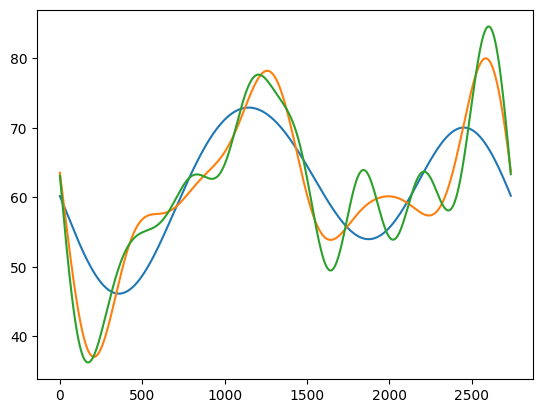

In [105]:
for num_ in [3, 6, 9]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))

fft_list_3 = np.copy(fft_list); fft_list_3[3:-3]=0
dataset_total['FT3'] = np.fft.ifft(fft_list_3).real

fft_list_6 = np.copy(fft_list); fft_list_6[6:-6]=0
dataset_total['FT6'] = np.fft.ifft(fft_list_6).real

fft_list_9 = np.copy(fft_list); fft_list_9[9:-9]=0
dataset_total['FT9'] = np.fft.ifft(fft_list_9).real

In [106]:
dataset_total['SNP'] = list(SNP_data['Close'])
dataset_total['INTC'] = list(INTC_data['Close'])
# dataset_total['AVGO'] = list(AVGO_data['Close'])
dataset_total['MU'] = list(MU_data['Close'])
dataset_total['MSFT'] = list(MSFT_data['Close'])
dataset_total['AAPL'] = list(AAPL_data['Close'])
dataset_total['TSM'] = list(TSM_data['Close'])
dataset_total['TXN'] = list(TXN_data['Close'])
# dataset_total['QCOM'] = list(QCOM_data['Close'])
dataset_total['NVDA'] = list(NVDA_data['Close'])
dataset_total['AMD'] = list(AMD_data['Close'])
dataset_total['NASDAQ'] = list(NASDAQ_data['Close'])
dataset_total['ASX'] = list(ASX_data['Close'])
dataset_total['MCHP'] = list(MCHP_data['Close'])
dataset_total['ADI'] = list(ADI_data['Close'])

In [107]:
positive_l = []
negative_l = []
neutral_l = []
for i in dataset_total['Date']:
    counter = 0
    pos = 0
    neg = 0
    neu = 0
    for j in QCOM_headlines.index:
        k = QCOM_headlines['date'][j]
        x = helper.date_parser(k[:10]).date()
        if (x == i):
            pos = pos + QCOM_headlines['positive'][QCOM_headlines.index == j].item()
            neg = neg + QCOM_headlines['negative'][QCOM_headlines.index == j].item()
            neu = neu + QCOM_headlines['neutral'][QCOM_headlines.index == j].item()
            counter += 1
    if (counter == 0):
        positive_l.append(0)
        negative_l.append(0)
        neutral_l.append(1)
    else:
        positive_l.append(pos/counter)
        negative_l.append(neg/counter)
        neutral_l.append(neu/counter)
dataset_total["pos"] = positive_l
dataset_total["neg"] = negative_l
dataset_total["neu"] = neutral_l

In [108]:
dataset_total.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'New_ID',
       'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum', 'ARIMA', 'FT3', 'FT6',
       'FT9', 'SNP', 'INTC', 'MU', 'MSFT', 'AAPL', 'TSM', 'TXN', 'NVDA', 'AMD',
       'NASDAQ', 'ASX', 'MCHP', 'ADI', 'pos', 'neg', 'neu'],
      dtype='object')

In [109]:
dataset_total_df = dataset_total[['Date','Close', 'Volume', 'ma7',
       'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band', 'lower_band',
       'ema', 'momentum', 'log_momentum', 'pos', 'neg', 'neu', 'SNP', 'INTC', 'MU', 'MSFT', 'AAPL', 'TSM', 'TXN', 'NVDA', 'AMD',
       'MCHP', 'ASX', 'ADI', 'NASDAQ', 'FT3', 'FT6', 'FT9', 'ARIMA']]

In [110]:
is_NaN = dataset_total_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
dataset_total_df_clean = dataset_total_df[-row_has_NaN]

In [111]:
target_sensor = "Close"
features = list(dataset_total_df_clean.columns.difference([target_sensor]))

forecast_lead = 1
target = f"{target_sensor}_lead{forecast_lead}"

dataset_total_df_clean[target] = dataset_total_df_clean[target_sensor].shift(-forecast_lead)
dataset_total_df_clean = dataset_total_df_clean.iloc[:-forecast_lead]

dataset_total_df_clean

,Date,Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,...,AMD,MCHP,ASX,ADI,NASDAQ,FT3,FT6,FT9,ARIMA,Close_lead1
20,2009-08-24,47.410000,11622100,46.248572,46.205239,46.258594,46.393626,0.135032,0.675459,47.556157,...,4.000000,9.086444,2.070271,20.003777,2017.979980,59.011022,59.718610,57.933112,47.410000,46.990002
21,2009-08-25,46.990002,21489900,46.371429,46.229525,46.324984,46.487762,0.162777,0.698043,47.625611,...,4.020000,9.027955,2.013551,20.239201,2024.229980,58.952286,59.525486,57.678530,46.990002,47.529999
22,2009-08-26,47.529999,14478300,46.740001,46.285239,46.432568,46.651620,0.219052,0.756850,47.798938,...,4.060000,9.100210,1.928471,20.431820,2024.430054,58.893530,59.332281,57.424420,47.529999,47.250000
23,2009-08-27,47.250000,10719700,47.040000,46.332858,46.504455,46.745380,0.240925,0.785730,47.904317,...,4.230000,9.089886,1.939815,20.396156,2027.729980,58.834755,59.139010,57.170812,47.250000,47.220001
24,2009-08-28,47.220001,11981100,47.254286,46.366191,46.566521,46.819537,0.253016,0.810129,47.986449,...,4.470000,9.241272,2.036238,20.460354,2028.770020,58.775962,58.945690,56.917735,47.220001,46.419998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,2020-06-03,84.110001,13029300,80.681428,79.455238,78.867586,80.511836,1.644250,2.057007,83.569251,...,52.730000,51.833862,3.557821,114.648697,9682.910156,60.526134,64.657000,64.616886,84.254958,86.040001
2733,2020-06-04,86.040001,12109000,81.827143,79.855714,79.398876,81.362323,1.963447,2.508215,84.872145,...,52.630001,50.909534,3.509415,115.365150,9615.809570,60.468446,64.471777,64.360929,84.435308,88.550003
2734,2020-06-05,88.550003,11882100,83.150000,80.316666,80.076737,82.468120,2.391382,3.148837,86.614340,...,53.099998,52.410370,3.622361,117.448441,9814.080078,60.410699,64.286048,64.104628,85.915765,91.370003
2735,2020-06-08,91.370003,9748300,85.044286,80.913809,80.913276,83.837640,2.924365,3.993781,88.901371,...,52.970001,51.681389,3.590091,116.618889,9924.750000,60.352895,64.099829,63.848014,88.566603,89.750000


In [112]:
dataset_total_df_clean.to_csv('dataset_QCOM_prediction.csv')